In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Paths to the downloaded datasets
merged_file_path = 'https://raw.githubusercontent.com/raccamateo/NEC_A2/main/A2-ring/A2-ring-merged.txt'
separable_file_path = 'https://raw.githubusercontent.com/raccamateo/NEC_A2/main/A2-ring/A2-ring-separable.txt'
test_file_path = 'https://raw.githubusercontent.com/raccamateo/NEC_A2/main/A2-ring/A2-ring-test.txt'

In [3]:
# Load the datasets
merged_data = pd.read_csv(merged_file_path, header=None, sep='\s+')
separable_data = pd.read_csv(separable_file_path, header=None, sep='\s+')
test_data = pd.read_csv(test_file_path, header=None, sep='\s+')

In [4]:
# Assuming the last column is the target variable
target_column_index = -1

In [5]:
# Splitting the datasets into features and target
X_merged = merged_data.iloc[:, :target_column_index].values
y_merged = merged_data.iloc[:, target_column_index].values
X_separable = separable_data.iloc[:, :target_column_index].values
y_separable = separable_data.iloc[:, target_column_index].values
X_test = test_data.iloc[:, :target_column_index].values
y_test = test_data.iloc[:, target_column_index].values

In [6]:
# Function to plot data
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.5, label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.5, label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

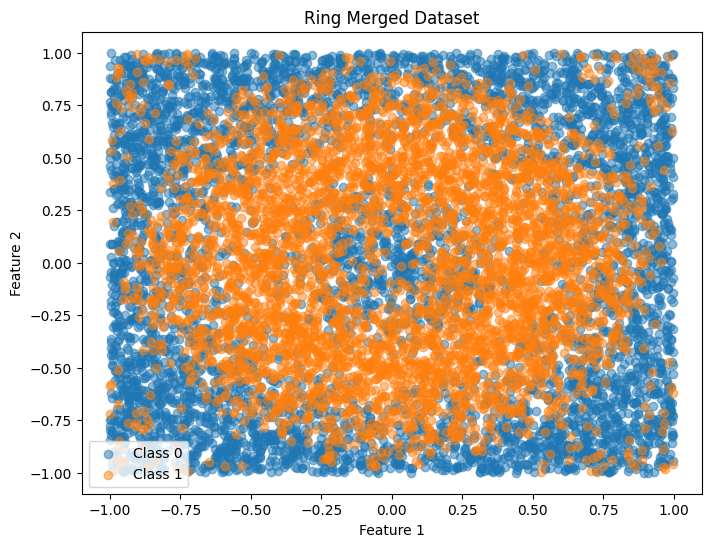

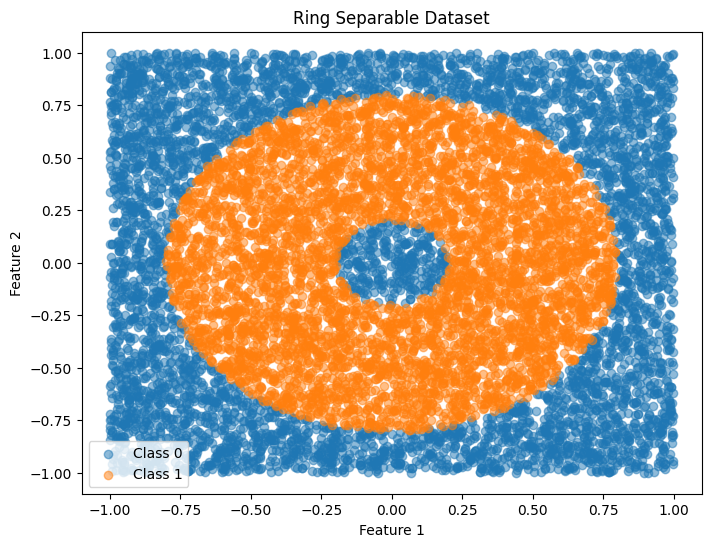

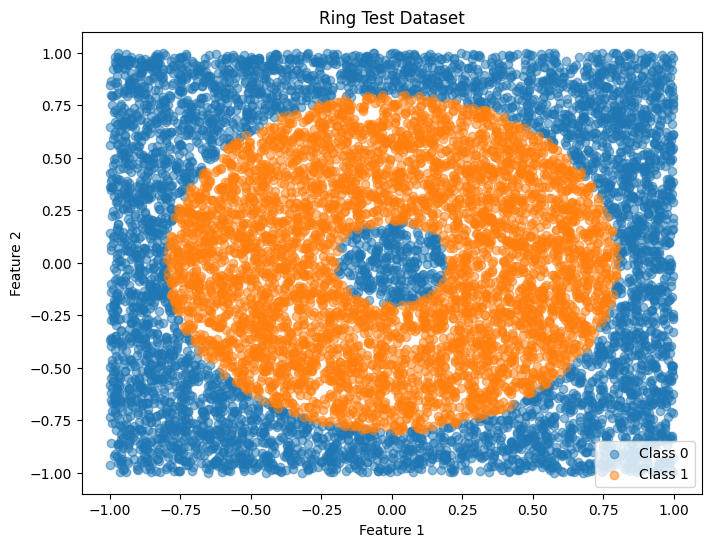

In [7]:
# Plotting the datasets
plot_data(X_merged, y_merged, 'Ring Merged Dataset')
plot_data(X_separable, y_separable, 'Ring Separable Dataset')
plot_data(X_test, y_test, 'Ring Test Dataset')

In [8]:
# Standardize the features
scaler = StandardScaler()
X_merged_scaled = scaler.fit_transform(X_merged)
X_separable_scaled = scaler.fit_transform(X_separable)
X_test_scaled = scaler.transform(X_test)  # Only transform, don't fit, to simulate real-world scenario

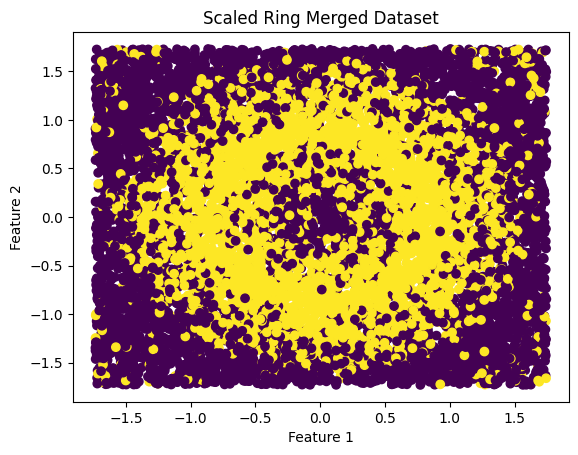

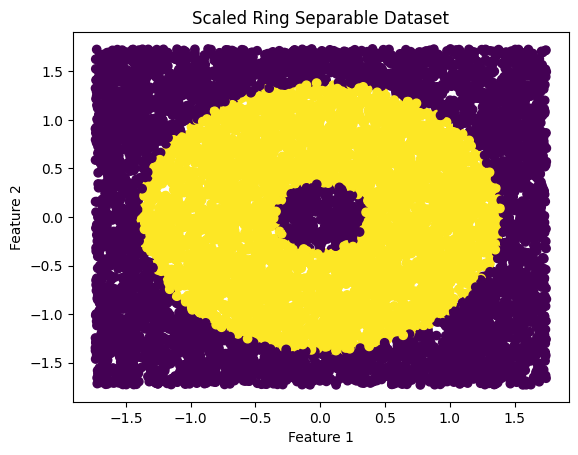

In [9]:
# Visualize the scaled data
plt.scatter(X_merged_scaled[:, 0], X_merged_scaled[:, 1], c=y_merged)
plt.title('Scaled Ring Merged Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.scatter(X_separable_scaled[:, 0], X_separable_scaled[:, 1], c=y_separable)
plt.title('Scaled Ring Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
# Combine the scaled features with their corresponding target variables
merged_scaled = np.column_stack((X_merged_scaled, y_merged))
separable_scaled = np.column_stack((X_separable_scaled, y_separable))
test_scaled = np.column_stack((X_test_scaled, y_test))

In [11]:
# Save the scaled datasets
np.savetxt("ring_merged_scaled.csv", merged_scaled, delimiter=",")
np.savetxt("ring_separable_scaled.csv", separable_scaled, delimiter=",")
np.savetxt("ring_test_scaled.csv", test_scaled, delimiter=",")